In [1]:
import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.5.0


In [2]:
import os
base_dir = './dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_tshirt_dir = os.path.join(train_dir, 'Tshirt')
train_fshirt_dir = os.path.join(train_dir, 'Fshirt')
train_pents_dir = os.path.join(train_dir, 'Pents')


# Directory with our validation cat/dog pictures
validation_tshirt_dir = os.path.join(validation_dir, 'Tshirt')
validation_fshirt_dir = os.path.join(validation_dir, 'Fshirt')
validation_pents_dir = os.path.join(validation_dir, 'Pents')


In [3]:
train_tshirt_fnames = os.listdir( train_tshirt_dir )
train_fshirt_fnames = os.listdir( train_fshirt_dir )
train_pents_fnames = os.listdir( train_pents_dir )


print(train_tshirt_fnames[:10])
print(train_fshirt_fnames[:10])
print(train_pents_fnames[:10])


['257.jpg', '59.jpg', '248.jpg', '200.jpg', '273.jpg', '268.jpg', '124.jpg', '315.jpg', '420.jpg', '192.jpg']
['257.jpg', '59.jpg', '248.jpg', '200.jpg', '273.jpg', '268.jpg', '124.jpg', '315.jpg', '420.jpg', '192.jpg']
['257.jpg', '59.jpg', '248.jpg', '200.jpg', '273.jpg', '268.jpg', '124.jpg', '315.jpg', '420.jpg', '192.jpg']


In [4]:
print('total training cat images :', len(os.listdir(      train_tshirt_dir ) ))
print('total training dog images :', len(os.listdir(      train_fshirt_dir ) ))
print('total training dog images :', len(os.listdir(      train_pents_dir ) ))

print('total validation cat images :', len(os.listdir( validation_tshirt_dir ) ))
print('total validation dog images :', len(os.listdir( validation_fshirt_dir ) ))
print('total validation dog images :', len(os.listdir( validation_pents_dir ) ))


total training cat images : 491
total training dog images : 491
total training dog images : 491
total validation cat images : 160
total validation dog images : 160
total validation dog images : 160


In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 6
ncols = 4

pic_index = 0 # Index for iterating over images

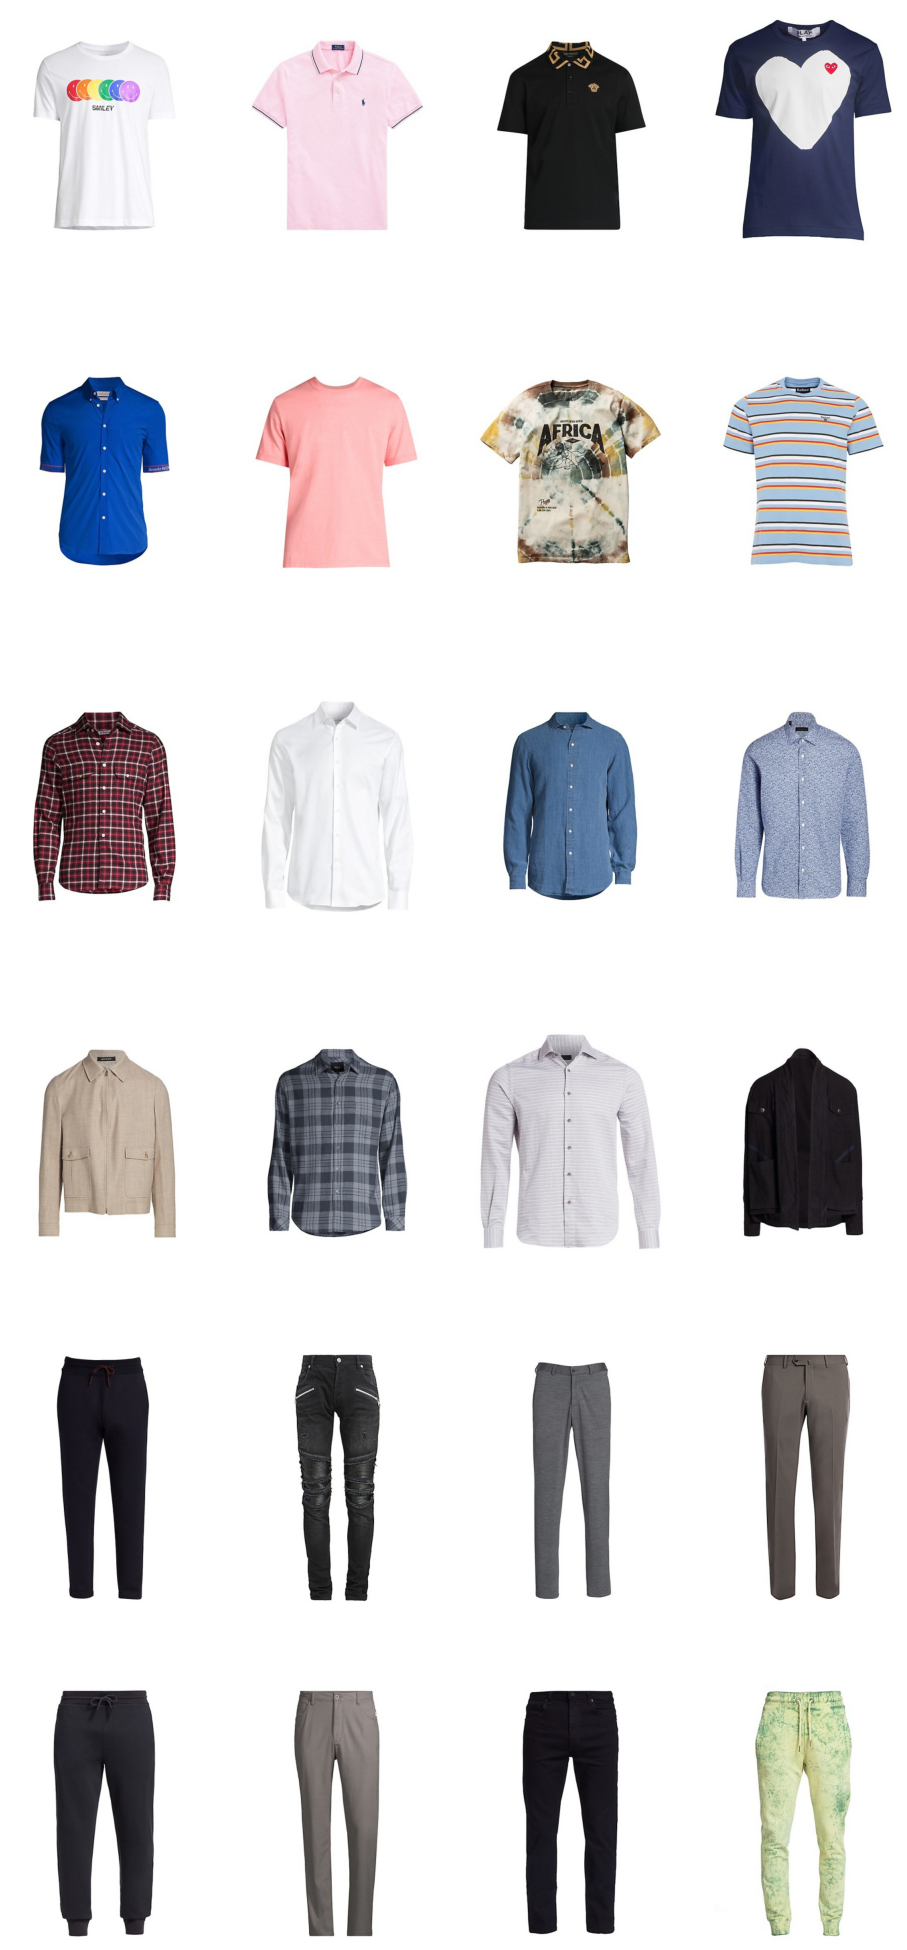

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*6)

pic_index+=12

next_tshirt_pix = [os.path.join(train_tshirt_dir, fname) 
                for fname in train_tshirt_fnames[ pic_index-8:pic_index] 
               ]

next_fshirt_pix = [os.path.join(train_fshirt_dir, fname) 
                for fname in train_fshirt_fnames[ pic_index-8:pic_index]
               ]
next_pents_pix = [os.path.join(train_pents_dir, fname) 
                for fname in train_fshirt_fnames[ pic_index-8:pic_index]
               ]


for i, img_path in enumerate(next_tshirt_pix+next_fshirt_pix+next_pents_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(3, activation='softmax')  
])

The `model.summary()` method call prints a summary of the NN 

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

/home/alee/Documents/MuhammadAlee/ClothClassifier/env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size=16

train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=batch_size,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


Found 1473 images belonging to 3 classes.
Found 480 images belonging to 3 classes.


In [11]:
# steps_per_epoch = len(train_dataset) // batch_size
# validation_steps  = len(test_dataset) // batch_size



history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=1473//batch_size,
                              epochs=100,
                              validation_steps=480//batch_size,
                              verbose=2)

Epoch 1/100
92/92 - 13s - loss: 0.1777 - accuracy: 0.9190 - val_loss: 0.1040 - val_accuracy: 0.9542
Epoch 2/100
92/92 - 12s - loss: 0.0413 - accuracy: 0.9883 - val_loss: 0.0034 - val_accuracy: 0.9979
Epoch 3/100
92/92 - 12s - loss: 0.0152 - accuracy: 0.9911 - val_loss: 0.0111 - val_accuracy: 0.9979
Epoch 4/100
92/92 - 12s - loss: 0.0151 - accuracy: 0.9966 - val_loss: 0.0029 - val_accuracy: 0.9979
Epoch 5/100
92/92 - 12s - loss: 0.0065 - accuracy: 0.9966 - val_loss: 0.0033 - val_accuracy: 0.9979
Epoch 6/100
92/92 - 12s - loss: 0.0028 - accuracy: 0.9986 - val_loss: 0.0029 - val_accuracy: 0.9979
Epoch 7/100
92/92 - 12s - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0083 - val_accuracy: 0.9979
Epoch 8/100
92/92 - 12s - loss: 3.3029e-04 - accuracy: 1.0000 - val_loss: 6.6130e-04 - val_accuracy: 1.0000
Epoch 9/100
92/92 - 12s - loss: 0.0086 - accuracy: 0.9993 - val_loss: 0.0171 - val_accuracy: 0.9979
Epoch 10/100
92/92 - 12s - loss: 3.0251e-05 - accuracy: 1.0000 - val_loss: 0.0108 - val_accu

Epoch 78/100
92/92 - 12s - loss: 1.8241e-11 - accuracy: 1.0000 - val_loss: 2.8739e-04 - val_accuracy: 1.0000
Epoch 79/100
92/92 - 12s - loss: 1.8399e-11 - accuracy: 1.0000 - val_loss: 2.8128e-04 - val_accuracy: 1.0000
Epoch 80/100
92/92 - 12s - loss: 1.8619e-11 - accuracy: 1.0000 - val_loss: 2.7652e-04 - val_accuracy: 1.0000
Epoch 81/100
92/92 - 13s - loss: 1.8921e-11 - accuracy: 1.0000 - val_loss: 2.7259e-04 - val_accuracy: 1.0000
Epoch 82/100
92/92 - 12s - loss: 1.9306e-11 - accuracy: 1.0000 - val_loss: 2.6946e-04 - val_accuracy: 1.0000
Epoch 83/100
92/92 - 12s - loss: 1.9598e-11 - accuracy: 1.0000 - val_loss: 2.0399e-04 - val_accuracy: 1.0000
Epoch 84/100
92/92 - 12s - loss: 3.0938e-11 - accuracy: 1.0000 - val_loss: 2.4794e-04 - val_accuracy: 1.0000
Epoch 85/100
92/92 - 12s - loss: 1.8807e-11 - accuracy: 1.0000 - val_loss: 2.5262e-04 - val_accuracy: 1.0000
Epoch 86/100
92/92 - 12s - loss: 1.9044e-11 - accuracy: 1.0000 - val_loss: 2.5364e-04 - val_accuracy: 1.0000
Epoch 87/100
92/92 

# Save Model in h5 format

In [43]:
# Save the trained model as a Keras HDF5 file. 

saved_model_path = "./model/model.h5"
model.save(saved_model_path)

# Test Evaluation

In [1]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np

model=load_model('model/model.h5')
test_image = image.load_img('TestImages/Pent/1.jpg', target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
# train_generator.class_indices

pred=np.argmax(result[0])

if pred==0:
    print("Fshirt")
elif pred==1:
    print("Pent")
elif pred==2:
    print("Tshirt")

Pent


### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

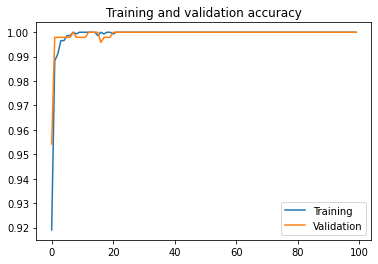

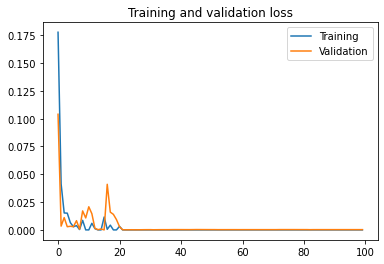

In [45]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

## Run the TensorFlow.js Converter on The Saved Keras Model

In the cell below, use the `tensorflowjs_converter` to convert the saved Keras model into JSON format.


In [46]:
# Use the tensorflow.js converter to convert the saved Keras model into JSON format.
! tensorflowjs_converter --input_format=keras {saved_model_path} "./model"

2021-08-05 11:19:57.708901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-05 11:19:57.708944: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Getting Server ON

In [1]:
!python3 -m http.server 8080

Serving HTTP on 0.0.0.0 port 8080 (http://0.0.0.0:8080/) ...
127.0.0.1 - - [05/Aug/2021 12:10:41] "GET /static/classifier.js HTTP/1.1" 200 -
^C

Keyboard interrupt received, exiting.
